# Lagrange Multiplier Motivation

## Otimization problem with equality constraint

In [1]:
using Optim, Calculus, LinearAlgebra, Plots

In [2]:
# Objective function
f(x) = -exp(-(x[1] * x[2] - 3/2)^2 - (x[2]- 3 /2)^2)

# Equality constraint
h(x) = x[1] - x[2]^2;

## Find optimal solution

In [3]:
# Substitute the constraint into the objective function
x₁(x₂) = x₂.^2
fu(x₂) = f([x₁(x₂); x₂])

# solve unconstrained objective
res = optimize(x₂ -> fu(first(x₂)), [0.], LBFGS())
opt_x₂ = first(Optim.minimizer(res))
opt_x = [x₁(opt_x₂), opt_x₂]; min_f = f(opt_x)

println("Optimal x₁, x₂: ", opt_x)
println("         Min f: ", min_f)

Optimal x₁, x₂: [1.3578043154345563, 1.1652486067078374]
         Min f: -0.887974742266445


## Alignment of gradients

In [4]:
# Objective and constraint gradients
∇f = Calculus.gradient(f)
∇h = Calculus.gradient(h);

In [5]:
# eval gradients at optimal point
nf = normalize!(∇f(opt_x))
nh = normalize!(∇h(opt_x));

println("nf: ", nf)
println("nh: ", nh)

nf: [0.3943241793241729, -0.918971404125459]
nh: [0.39432418041471096, -0.9189714036575167]


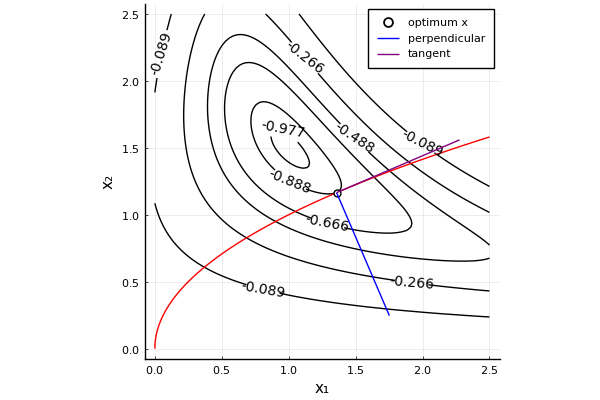

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [6]:
# plots
pyplot(xlabel="x₁", ylabel="x₂", colorbar=false, aspect_ratio=:equal)
x = y = LinRange(0, 2.5, 100)

contour(x, y, (x, y)->f([x, y]), levels=[1.1, 1, 0.75, 0.55, 0.3, 0.1]*min_f, c=:black, contour_labels=true)
contour!(x, y, (x, y)->h([x, y]), levels=[0.], c=:red)

scatter!([x₁(opt_x₂)], [opt_x₂], markersize=5, c=:white, label="optimum x")

perpend_x = opt_x + nh
tangent_x = opt_x + [-nh[2], nh[1]]

plot!([opt_x[1], perpend_x[1]], [opt_x[2], perpend_x[2]], color=:blue, label="perpendicular")
plot!([opt_x[1], tangent_x[1]], [opt_x[2], tangent_x[2]], color=:purple, label="tangent")

In [9]:
∇f(opt_x) ./ ∇h(opt_x)

2-element Array{Float64,1}:
 0.17006429917376598
 0.1700642997306908